# Assignment 3 - Data Set Description
The questions below relate to the data files associated with the contest with the title 'DengAI: Predicting Disease Spread' published at the following website. 
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

Anyone can join the contest and showcase your skills. To know about contest submissions visit the following webpage
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/
You can showcase your Machine Learning skills by ranking top in the contest. 

Problem description:
Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

Assignment:
The goal is achieved through three subsequent Assignments 1, 2 and 3, all using the same dataset


The features in this dataset
You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

City and date indicators

    city – City abbreviations: sj for San Juan and iq for Iquitos
    week_start_date – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements

    station_max_temp_c – Maximum temperature
    station_min_temp_c – Minimum temperature
    station_avg_temp_c – Average temperature
    station_precip_mm – Total precipitation
    station_diur_temp_rng_c – Diurnal temperature range
    
PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

    precipitation_amt_mm – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

    reanalysis_sat_precip_amt_mm – Total precipitation
    reanalysis_dew_point_temp_k – Mean dew point temperature
    reanalysis_air_temp_k – Mean air temperature
    reanalysis_relative_humidity_percent – Mean relative humidity
    reanalysis_specific_humidity_g_per_kg – Mean specific humidity
    reanalysis_precip_amt_kg_per_m2 – Total precipitation
    reanalysis_max_air_temp_k – Maximum air temperature
    reanalysis_min_air_temp_k – Minimum air temperature
    reanalysis_avg_temp_k – Average air temperature
    reanalysis_tdtr_k – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

    ndvi_se – Pixel southeast of city centroid
    ndvi_sw – Pixel southwest of city centroid
    ndvi_ne – Pixel northeast of city centroid
    ndvi_nw – Pixel northwest of city centroid

# Assignment 3 - Questions
Use the merged data frame from Assignment 1 (and 2) for this assignment

This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 and 2 (or reload with same steps and create merged data frame). In this assignment you need to use both i). Linear SVR regressor and ii) SVR with Linear kernel. Provide your intepretations.


1. Write a brief statement: Is it required to consider the repeating features in the model? (For example: precipitation_amt_mm and reanalysis_sat_precip_amt_mm. Similarly there are others). List which features you will choose in this model. Select the required columns in the dataframe and drop the others.
2. Preprocess the data 
    1. Encode the  categorical features
    2. Abbreviate the column names
    3. Standardize the numerical features
    4. Handle NaNs (either fill them with Median values or make a better choice if available)
    5. Convert percentage to value/100 (check which option gives better result, as-is or divided/100)
    6. Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) as it is in scale of 0 to 0.5. Retain as is or use other scaling based on how model performs.
    7. Make an 80-20 train-test split 
3. Build a Linear SVR regressor, train the model
    1. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.
    2. List the hyper-parameters that can be tuned in Linear SVR. Explain the meaning of each hyper-parameter. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 
    3. Plot Learning curve and provide insights
4. Build a SVR model with Linear Kernel, train the model
    1. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.
    2. List the hyper-parameters that can be tuned in SVR model with Linear Kernel. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 
    3. List the hyper-parameters that can be tuned in SVR model with Linear Kernel. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 
5. Create a submission file which has predictions for both cities in the submission format prescribed by the contest at the link https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/. To get this, you need to use the file 'dengue_features_test.csv'
6. Optional: Submit your predictions to the contest. You will get a submission score. Use any other models of your choice discusssed in the class and check if you get improved result. Show it here.
7. Compare the Model Evaluation metric of SGD (Assignment 2), Linear SVR and SVR with Linear Kernel and state which model performed better along with reason why you consider so.

Submit the following for this assignment: 
1. .ipynb and .html formats of Jupyter notebook code with outputs and 
2. the submission_format.csv with your predictions

Note:
Missing each of these will take out 0.1 point at each applicable place:
1. Using full file path (you can use path=input() to set path and use it in os.chdir())
2. Not labeling plots (x-label, y-label, title), not presentable plots (too small/oversized/overflow/unreadbale labels etc)
3. Not having observation below each plot, dataframe output, model result/evaluation output where applies. Observation should be pointed, should not be generic statement and should be backed up with technical evidence from the results obtained.
4. Not showing each question as markdown, then answer, then observation as markdown
5. Printing full/lengthy dataframe
6. Importing excess libraries and not used in code



### What we have done in Assignment 1 and 2.
Merged dataframes and dealing with null values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Set working directory
#The first dataframe as csv
df1 = pd.read_csv('dengue_features_train.csv')

In [2]:
df1.columns = df1.columns.str.replace('station','stn')
df1.columns = df1.columns.str.replace('reanalysis','re_an')
df1.columns = df1.columns.str.replace('humidity','hd')
df1.columns = df1.columns.str.replace('precipitation','precip')
df1.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,30-04-1990,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,07-05-1990,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,14-05-1990,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [3]:
# The second dataframe
df2 = pd.read_csv('dengue_labels_train.csv')
# Merging the two dataframes
df3 = pd.merge(df1, df2, how='outer', on=['city','year','weekofyear'])
df3.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
# The below 3 columns as category
df3.city = df3.city.astype('category')
df3.year = df3.year.astype('category')
df3.week_start_date = df3.week_start_date.astype('category')

df3.dtypes

city                          category
year                          category
weekofyear                       int64
week_start_date               category
ndvi_ne                        float64
ndvi_nw                        float64
ndvi_se                        float64
ndvi_sw                        float64
precip_amt_mm                  float64
re_an_air_temp_k               float64
re_an_avg_temp_k               float64
re_an_dew_point_temp_k         float64
re_an_max_air_temp_k           float64
re_an_min_air_temp_k           float64
re_an_precip_amt_kg_per_m2     float64
re_an_relative_hd_percent      float64
re_an_sat_precip_amt_mm        float64
re_an_specific_hd_g_per_kg     float64
re_an_tdtr_k                   float64
stn_avg_temp_c                 float64
stn_diur_temp_rng_c            float64
stn_max_temp_c                 float64
stn_min_temp_c                 float64
stn_precip_mm                  float64
total_cases                      int64
dtype: object

### Question 1

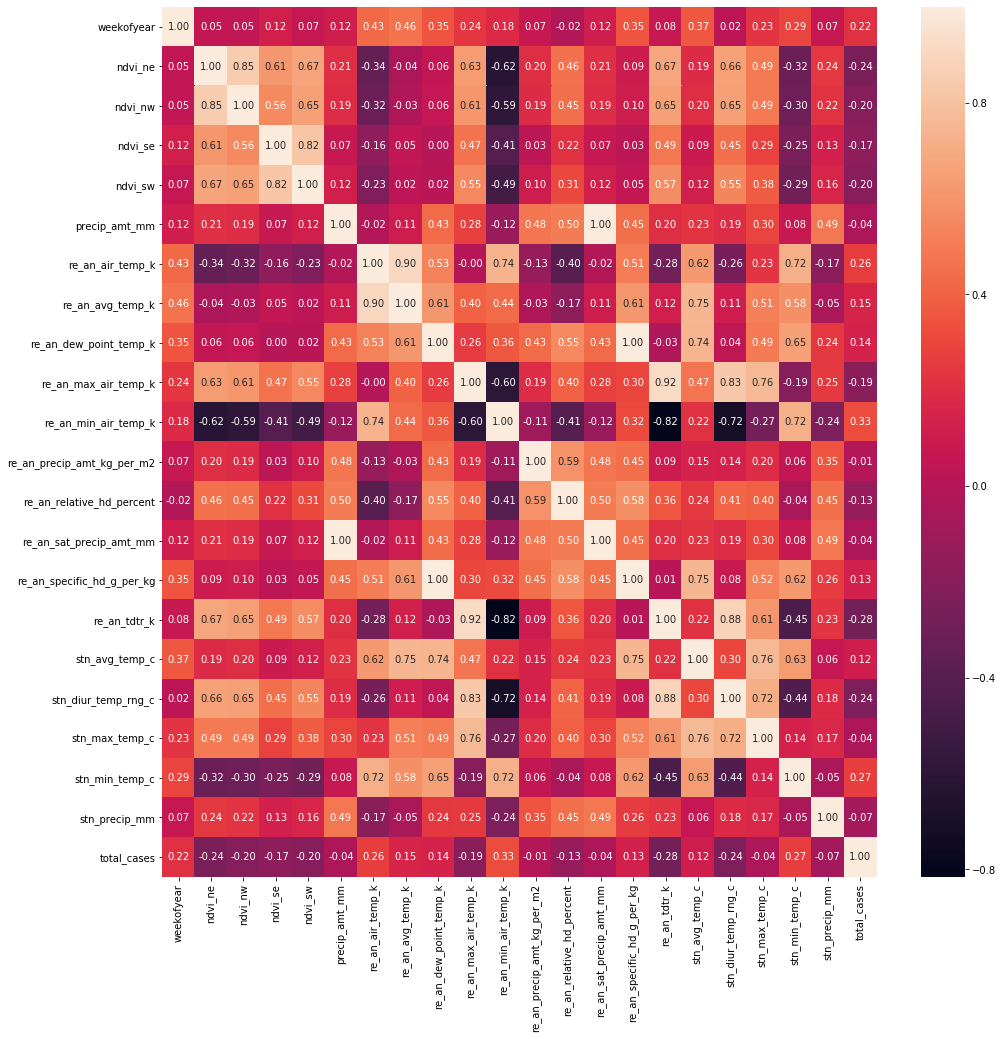

In [5]:
# To check for correlation between the features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(df3.corr(),annot=True,fmt=".2f")

#### Answer
1. I believe it is best to drop a column with same values because it will not add any value to differentiate 2 different labels. Moreover, it can lead to underfitting. Also, it will reduce computational needs by removing such columns.Hence removing 'reanalysis_sat_precip_amt_mm'
2. week start date is also dropped as it wont affect in improving the model accuracy.

### Question 2

In [6]:
#Counting NAN values in merged dataframe
null_columns = df3.columns[df3.isna().any()]
print("Null values count: %d"  %df3[null_columns].isna().sum().sum())

#Using forward fill to remove NAN values
df3=df3.fillna(method='ffill')

#Displaying to verify the absence of NAN values
print("Null values after forward fill: %d"  %df3[null_columns].isna().sum().sum())

Null values count: 548
Null values after forward fill: 0


In [7]:
# Dropping column 're_an_sat_precip_amt_mm' and 'week_start_date'
df_new = df3.drop(['re_an_sat_precip_amt_mm','week_start_date'], axis = 1)
df_new.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [8]:
df_new.dtypes

city                          category
year                          category
weekofyear                       int64
ndvi_ne                        float64
ndvi_nw                        float64
ndvi_se                        float64
ndvi_sw                        float64
precip_amt_mm                  float64
re_an_air_temp_k               float64
re_an_avg_temp_k               float64
re_an_dew_point_temp_k         float64
re_an_max_air_temp_k           float64
re_an_min_air_temp_k           float64
re_an_precip_amt_kg_per_m2     float64
re_an_relative_hd_percent      float64
re_an_specific_hd_g_per_kg     float64
re_an_tdtr_k                   float64
stn_avg_temp_c                 float64
stn_diur_temp_rng_c            float64
stn_max_temp_c                 float64
stn_min_temp_c                 float64
stn_precip_mm                  float64
total_cases                      int64
dtype: object

In [9]:
#Converting ndvis to 0 and 1
df_new['ndvi_ne'] = np.where((df_new['ndvi_ne']<=0.25), 0, 1)
df_new['ndvi_nw'] = np.where((df_new['ndvi_nw']<=0.25), 0, 1)
df_new['ndvi_se'] = np.where((df_new['ndvi_se']<=0.25), 0, 1)
df_new['ndvi_sw'] = np.where((df_new['ndvi_sw']<=0.25), 0, 1)

In [10]:
#Converting % values by dividing it to 100
df_new['re_an_relative_hd_percent'] = df_new['re_an_relative_hd_percent'].div(100).round(2)

In [11]:
df_ndvi_percent = df_new[['ndvi_ne','ndvi_nw','ndvi_se','re_an_relative_hd_percent']]
df_ndvi_percent

,ndvi_ne,ndvi_nw,ndvi_se,re_an_relative_hd_percent
0,0,0,0,0.73
1,0,0,0,0.77
2,0,0,0,0.82
3,0,0,0,0.80
4,0,1,1,0.80
5,0,0,1,0.80
6,0,0,0,0.82
7,0,0,0,0.83
8,0,0,0,0.83
9,0,0,0,0.81


In [12]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder 
# creating instance of label-encoder
le = LabelEncoder()

In [13]:
df_le = df_new[['city', 'year']].apply(le.fit_transform)
df_le

,city,year
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [14]:
# Dataframe of only numerical columns
df_num = df_new.drop(['city','year','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','re_an_relative_hd_percent','total_cases'], axis=1)

In [15]:
#Normalizing numerical feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [16]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)
type(df_scaled)
df_scaled

,weekofyear,precip_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,re_an_dew_point_temp_k,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_precip_amt_kg_per_m2,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,-0.566356,-0.760139,-0.826384,-1.171427,-1.854064,-1.119924,0.070466,-0.187274,-1.772476,-0.641063,-1.356941,-0.558712,-1.552648,-1.338708,-0.489876
1,-0.499753,-0.522502,-0.357358,-0.616859,-0.847423,-0.779569,0.265892,-0.511878,-0.890359,-0.713680,-0.363964,-0.807790,-0.379236,0.063840,-0.646168
2,-0.433150,-0.254704,0.061303,-0.271668,0.123667,-0.903335,0.617658,-0.323488,0.066811,-0.733851,-0.363964,-0.753935,-0.124146,0.446353,0.046589
3,-0.366547,-0.692961,0.212399,0.005616,0.042275,-0.624862,0.500402,-0.605150,-0.047160,-0.697543,0.227360,-0.619298,0.437051,0.765113,-0.743323
4,-0.299943,-0.872102,0.602730,0.350807,0.377199,-0.470156,0.695828,-0.644398,0.301239,-0.532139,1.376536,0.605899,1.304356,1.147626,-0.705306
5,-0.233340,-0.825032,0.684574,0.430031,0.396845,-0.315449,0.930338,-0.314484,0.303093,-0.790330,0.729427,-0.538516,0.998248,1.147626,-0.001989
6,-0.166737,-0.964415,0.373988,-0.000043,0.406200,-0.655804,0.773998,-0.034899,0.316992,-0.806467,0.182732,-0.619298,-0.124146,0.765113,-0.200523
7,-0.100134,2.409112,0.656243,0.243288,0.842162,-0.872393,1.047594,-0.233448,0.798820,-0.939597,0.930254,-0.188460,0.743159,0.446353,-0.382160
8,-0.033530,-0.602476,0.646800,0.265924,0.742059,-0.408273,0.773998,-0.060064,0.677436,-0.850844,0.896783,-0.329829,0.743159,0.446353,-0.382160
9,0.033073,-0.714668,1.069658,0.837469,0.920747,-0.346390,1.164849,-0.270387,0.859975,-0.814535,0.896783,-0.740472,0.743159,1.466387,-0.804573


In [17]:
df_result = pd.concat([df_le, df_ndvi_percent, df_scaled], axis=1, join='outer')
df_result

,city,year,ndvi_ne,ndvi_nw,ndvi_se,re_an_relative_hd_percent,weekofyear,precip_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,...,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_precip_amt_kg_per_m2,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,1,0,0,0,0,0.73,-0.566356,-0.760139,-0.826384,-1.171427,...,-1.119924,0.070466,-0.187274,-1.772476,-0.641063,-1.356941,-0.558712,-1.552648,-1.338708,-0.489876
1,1,0,0,0,0,0.77,-0.499753,-0.522502,-0.357358,-0.616859,...,-0.779569,0.265892,-0.511878,-0.890359,-0.713680,-0.363964,-0.807790,-0.379236,0.063840,-0.646168
2,1,0,0,0,0,0.82,-0.433150,-0.254704,0.061303,-0.271668,...,-0.903335,0.617658,-0.323488,0.066811,-0.733851,-0.363964,-0.753935,-0.124146,0.446353,0.046589
3,1,0,0,0,0,0.80,-0.366547,-0.692961,0.212399,0.005616,...,-0.624862,0.500402,-0.605150,-0.047160,-0.697543,0.227360,-0.619298,0.437051,0.765113,-0.743323
4,1,0,0,1,1,0.80,-0.299943,-0.872102,0.602730,0.350807,...,-0.470156,0.695828,-0.644398,0.301239,-0.532139,1.376536,0.605899,1.304356,1.147626,-0.705306
5,1,0,0,0,1,0.80,-0.233340,-0.825032,0.684574,0.430031,...,-0.315449,0.930338,-0.314484,0.303093,-0.790330,0.729427,-0.538516,0.998248,1.147626,-0.001989
6,1,0,0,0,0,0.82,-0.166737,-0.964415,0.373988,-0.000043,...,-0.655804,0.773998,-0.034899,0.316992,-0.806467,0.182732,-0.619298,-0.124146,0.765113,-0.200523
7,1,0,0,0,0,0.83,-0.100134,2.409112,0.656243,0.243288,...,-0.872393,1.047594,-0.233448,0.798820,-0.939597,0.930254,-0.188460,0.743159,0.446353,-0.382160
8,1,0,0,0,0,0.83,-0.033530,-0.602476,0.646800,0.265924,...,-0.408273,0.773998,-0.060064,0.677436,-0.850844,0.896783,-0.329829,0.743159,0.446353,-0.382160
9,1,0,0,0,0,0.81,0.033073,-0.714668,1.069658,0.837469,...,-0.346390,1.164849,-0.270387,0.859975,-0.814535,0.896783,-0.740472,0.743159,1.466387,-0.804573


In [18]:
y = df_new[['total_cases']]
y

,total_cases
0,4
1,5
2,4
3,3
4,6
5,2
6,4
7,5
8,10
9,6


In [19]:
#Check the number of NAN values in each column
df_result.isnull().values.any()

False

In [20]:
# 80-20 train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_result, y, test_size=0.2, random_state=42)

### Question 3

In [21]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [22]:
#Import libraries for building Linear SVR model
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [23]:
y_pred1 = svm_reg.predict(X_test)

In [24]:
#Importing metrics and calculating rmse
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print ("MAE : %.2f" %mean_absolute_error(y_test, y_pred1))

MAE : 22.56


In [25]:
# Plotting learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)    
    train_errors, val_errors = [], []    
    for m in range(1, len(X_train)):        
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))        
        val_errors.append(mean_squared_error(y_val, y_val_predict))    
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")    
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val") 

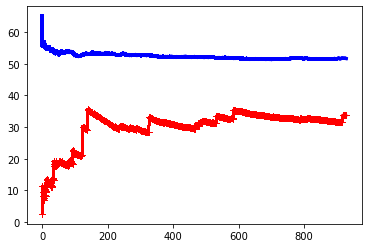

In [26]:
plot_learning_curves(svm_reg, X_train, y_train)

### Question 4

In [27]:
#Importing libraries for building Linear SVR with kernel model

from sklearn.svm import SVR

svr_linear_reg = SVR(kernel='linear', C=50, gamma=1, epsilon=.001 , tol = 1e-5)

# Building a linear SVR Kernel model with below parameters

svr_linear_reg.fit(X_train, y_train)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=1e-05, verbose=False)

In [28]:
# Predicting the validation data using the linear SVR Kernel model

y_pred2 = svr_linear_reg.predict(X_test)

In [38]:
# Calculating MAE

print ("MAE: ",round(mean_absolute_error(y_test, y_pred2),2))

MAE:  22.5


### Question 5

In [30]:
# Loading the data 'dengue_features_test.csv' from the website and performed the necessary preprocessing
df_test = pd.read_csv('dengue_features_test.csv')
df_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
8,sj,2008,26,2008-06-24,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,...,17.10,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7
9,sj,2008,27,2008-07-01,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,...,11.90,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9


In [31]:
# Loading the data 'dengue_features_test.csv' from the website and performed the necessary preprocessing
df_test = pd.read_csv('dengue_features_test.csv')

df_test.columns = df_test.columns.str.replace('station','stn')
df_test.columns = df_test.columns.str.replace('reanalysis','re_an')
df_test.columns = df_test.columns.str.replace('humidity','hd')
df_test.columns = df_test.columns.str.replace('precipitation','precip')

null_columns = df_test.columns[df_test.isna().any()]
print("Null values before forward fill: %d"  %df_test[null_columns].isna().sum().sum())

# Utilized forward filling method to remove null values
df_test.fillna(method='ffill',inplace=True)

#Displaying to verify the absence of NAN values
print("Null values after forward fill: %d"  %df_test[null_columns].isna().sum().sum())

# Dropping column 're_an_sat_precip_amt_mm' and 'week_start_date'
df_test = df_test.drop(['re_an_sat_precip_amt_mm','week_start_date'], axis = 1)
df_test.head()

df_test['ndvi_ne'] = np.where((df_test['ndvi_ne']<=0.25), 0, 1)
df_test['ndvi_nw'] = np.where((df_test['ndvi_nw']<=0.25), 0, 1)
df_test['ndvi_se'] = np.where((df_test['ndvi_se']<=0.25), 0, 1)
df_test['ndvi_sw'] = np.where((df_test['ndvi_sw']<=0.25), 0, 1)

df_test['re_an_relative_hd_percent'] = df_test['re_an_relative_hd_percent'].div(100).round(2)

df_ndvi_percent_test = df_test[['ndvi_ne','ndvi_nw','ndvi_se','re_an_relative_hd_percent']]
df_ndvi_percent_test

le_df_test = df_test[['city', 'year']].apply(le.fit_transform)

# Dataframe of only numerical columns
num_df_test = df_test.drop(['city','year','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','re_an_relative_hd_percent'], axis=1)

scaled_df_test = pd.DataFrame(scaler.fit_transform(num_df_test), columns = num_df_test.columns)
type(scaled_df_test)

x_df_test = pd.concat([le_df_test, df_ndvi_percent_test, scaled_df_test], axis=1, join='outer')
x_df_test

Null values before forward fill: 119
Null values after forward fill: 0


,city,year,ndvi_ne,ndvi_nw,ndvi_se,re_an_relative_hd_percent,weekofyear,precip_amt_mm,re_an_air_temp_k,re_an_avg_temp_k,...,re_an_max_air_temp_k,re_an_min_air_temp_k,re_an_precip_amt_kg_per_m2,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,1,0,0,0,0,0.79,-0.564156,1.150400,-0.221428,-0.613830,...,-0.810072,0.237796,-0.341243,-0.641950,-0.561356,-0.679804,-0.317596,0.399792,-0.389715,1.194135
1,1,0,0,0,0,0.78,-0.497312,-0.728707,-0.233126,-0.608350,...,-0.906918,0.346782,-0.413805,-0.723550,-0.718996,-1.054143,-0.935567,-1.314781,-0.097815,0.009773
2,1,0,0,0,0,0.78,-0.430468,-0.981948,0.435638,0.005401,...,-0.454972,0.237796,-0.776824,-0.156931,-0.193532,0.466610,-0.017438,0.140009,0.252466,-0.896597
3,1,0,0,0,0,0.73,-0.363624,-1.086090,0.595518,0.290357,...,-0.196717,0.419439,-0.816180,-0.733636,-0.217784,0.571893,-0.641295,0.399792,1.186548,-0.974782
4,1,0,0,0,0,0.74,-0.296780,-1.064465,0.656935,0.246517,...,-0.422690,0.564754,-0.771904,-0.501670,-0.444137,0.209252,-0.305825,0.399792,0.544367,1.451857
5,1,0,0,0,0,0.77,-0.229936,0.938986,0.649136,0.290357,...,-0.551818,0.673740,-0.399047,-0.161515,-0.638155,0.525101,-1.094474,0.140009,1.536829,-0.181346
6,1,0,0,0,0,0.77,-0.163093,0.307875,0.849960,0.504074,...,-0.390409,0.637412,-0.592752,0.058531,-0.553272,0.033781,-0.735462,-0.743257,0.544367,1.671934
7,1,0,0,0,0,0.77,-0.096249,-0.209420,1.137549,0.942467,...,-0.035308,0.637412,-0.713690,0.321670,-0.343087,1.145100,-0.347023,0.971317,1.186548,-0.974782
8,1,0,0,0,0,0.77,-0.029405,-0.857888,1.217488,0.975347,...,-0.358127,1.000699,-0.510761,0.487622,-0.658365,1.063214,-0.653066,0.140009,0.894647,-0.152389
9,1,0,0,0,0,0.79,0.037439,-0.587575,1.146322,0.904108,...,-0.422690,1.073356,-0.617350,0.571056,-0.816004,0.899440,-1.318121,-0.743257,1.536829,-0.899492


In [32]:
y_pred_test1 = svr_linear_reg.predict(x_df_test)
# Predicting the target value 'total_cases' and converting into decimal
final_pred = y_pred_test1.astype(int)

In [33]:
# Converting the predicted values to panda series and further into a dataframe
new_series = pd.Series(final_pred)
pred = new_series.to_frame(name='total_cases')
pred

,total_cases
0,25
1,25
2,25
3,22
4,26
5,24
6,27
7,27
8,29
9,28


In [34]:
# Loading the 'submission_format.csv' and dropping the 'total_cases' column.
df4 = pd.read_csv('submission_format.csv')
df4 = df4.drop(['total_cases'], axis = 1)

In [35]:
# This is the final desired data frame which predicted total_cases corresponding to each city, year and week_of_year
final_predictions = pd.merge(df4, pred, how="outer", left_index=True, right_index=True)
final_predictions

,city,year,weekofyear,total_cases
0,sj,2008,18,25
1,sj,2008,19,25
2,sj,2008,20,25
3,sj,2008,21,22
4,sj,2008,22,26
5,sj,2008,23,24
6,sj,2008,24,27
7,sj,2008,25,27
8,sj,2008,26,29
9,sj,2008,27,28


In [36]:
# FInally, loading the dataframe to csv
final_predictions.to_csv(r'C:\Users\RajKumar\Downloads\Data Science Programming ISM 6251\Assignment 3\submit_predictions.csv', index = False)

### Question 7
Mean absolute error for Linear SVR model is 22.56, Mean absolute error for Linear SVR with kernel model is 22.5 and based on assignment 2 
where we performed stochastic gradient descent regressor to train the model we got Mean absolute error as 10.137.

As the SGD has least MAE we will select it to train our dataset.
